In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret = fit_func(p,x)-y
    return ret

In [4]:
x=np.linspace(0,1,10)
x_point=np.linspace(0,1,1000)
y=real_func(x)
y_err=[np.random.normal(0,0.1)+y1 for y1 in y]

In [9]:
def fitting_func(m=0):
    p_init=np.random.rand(m+1)
    p_lsq=leastsq(residuals_func,p_init,args=(x,y_err))
    print('fitting paras:'+str(p_lsq[0]))
    
    plt.plot(x_point,real_func(x_point),label='real')
    plt.plot(x_point,fit_func(p_lsq[0],x_point),label='fitted curve')
    plt.plot(x,y_err,'bo',label='noise')
    plt.legend()
    return p_lsq

fitting paras:[ 20.39643052 -30.18768435   9.96936169  -0.05946724]
(array([ 20.39643052, -30.18768435,   9.96936169,  -0.05946724]), 1)


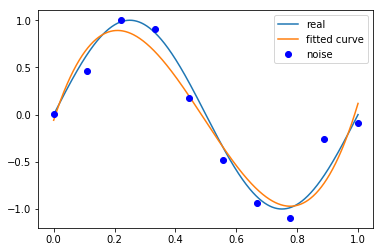

      3         2
20.4 x - 30.19 x + 9.969 x - 0.05947


In [25]:
p_new=fitting_func(m=3)
print(p_new)
plt.show()
print(np.poly1d(p_new[0]))

In [26]:
regularization=0.0001
def residuals_regularization_func(p,x,y):
    ret=fit_func(p,x)-y
    ret=np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    return ret
    

In [28]:
p_init=np.random.rand(4)
p_lsq_regu=leastsq(residuals_regularization_func,p_init,args=(x,y_err))
p_lsq_regu


(array([ 19.80133025, -29.27087643,   9.60603893,  -0.03508063]), 1)

In [30]:
np.sqrt(0.5*regularization*np.square(p_lsq_regu[0]))

array([0.14001655, 0.20697635, 0.06792495, 0.00024806])